In [1901]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1904]:
# Load the dataset.
df = pd.read_csv('ionosphere_data.csv')

In [1906]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [1909]:
df['feature2'].unique()

array([0], dtype=int64)

In [1910]:
df.drop(df.columns[1], inplace=True, axis=1)


In [1911]:
df.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [1916]:
# Find missing values
df.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [1917]:
df['label'] = [1 if lbl == 'g' else 0 for lbl in df['label']]

In [1918]:
train_data = df.sample(frac= 0.6, random_state=125)
test_data = df.drop(train_data.index)

In [1919]:
train_label = train_data.iloc[:,-1]
train_data = train_data.iloc[:,0:-1]
test_label = test_data.iloc[:,-1]
test_data = test_data.iloc[:,0:-1]

In [1925]:
train_data.shape

(211, 33)

In [1926]:
test_data.shape

(140, 33)

In [1927]:
train_label.shape

(211,)

In [1928]:
test_label.shape

(140,)

In [1929]:
train_label.sum()

140

In [1930]:
len(train_label)

211

In [1931]:
# train_label.sum()/len(train_label)

### Data Preprocessing

In [1932]:
train_data = train_data.to_numpy()

In [1933]:
train_label = train_label.to_numpy().astype('float32')

In [1934]:
test_data = test_data.to_numpy()

In [1935]:
test_label = test_label.to_numpy().astype('float32')

In [1936]:
#train_set = np.array(train_set.as_matrix())
#train_label = np.array(pd.DataFrame(train_label).as_matrix())

In [1937]:
print(type(train_data))
print(type(train_label))
print(type(test_data))
print(type(test_label))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [1938]:
print(train_data.dtype)
print(train_label.dtype)
print(test_label.dtype)
print(test_data.dtype)

float64
float32
float32
float64


### Model Architecture

In [1939]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,  activation='sigmoid'))

In [1940]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 128)               4352      
_________________________________________________________________
dropout_68 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_69 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 65        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [1941]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [1942]:
history = model.fit(train_data, train_label, validation_split=0.25, epochs= 75, batch_size = 32)

Epoch 1/75
5/5 [==============================] - 1s 66ms/step - loss: 0.6412 - accuracy: 0.6187 - val_loss: 0.5181 - val_accuracy: 0.7925
Epoch 2/75
5/5 [==============================] - 0s 17ms/step - loss: 0.5304 - accuracy: 0.8127 - val_loss: 0.4738 - val_accuracy: 0.8302
Epoch 3/75
5/5 [==============================] - 0s 20ms/step - loss: 0.5007 - accuracy: 0.7915 - val_loss: 0.4405 - val_accuracy: 0.8679
Epoch 4/75
5/5 [==============================] - 0s 20ms/step - loss: 0.4766 - accuracy: 0.8221 - val_loss: 0.4160 - val_accuracy: 0.8491
Epoch 5/75
5/5 [==============================] - 0s 17ms/step - loss: 0.4203 - accuracy: 0.8504 - val_loss: 0.3884 - val_accuracy: 0.8868
Epoch 6/75
5/5 [==============================] - 0s 20ms/step - loss: 0.4194 - accuracy: 0.8170 - val_loss: 0.3626 - val_accuracy: 0.9057
Epoch 7/75
5/5 [==============================] - 0s 18ms/step - loss: 0.3825 - accuracy: 0.8641 - val_loss: 0.3398 - val_accuracy: 0.9245
Epoch 8/75
5/5 [===========

In [1943]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

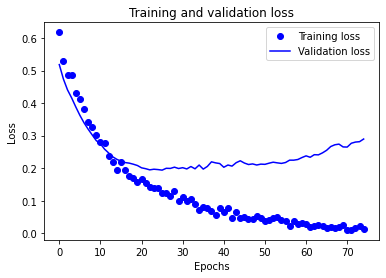

In [1944]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(75)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1946]:
score = model.evaluate(test_data, test_label)

5/5 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.9286
